In [26]:
import matplotlib as mpl
mpl.rc('text', usetex=False)
mpl.rc('font', family='serif')
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)
mpl.rc('axes', labelsize=20)
mpl.rc('axes', titlesize=20)
mpl.rc('figure', figsize=(6, 4))
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

import firedrake as fd
import hydrogym as gym

In [27]:
sys = sio.loadmat('../output/lti.mat')

In [31]:
flow = gym.flow.Cylinder(h5_file='../output/checkpoint.h5')

flow.load_checkpoint('../output/checkpoint.h5')  # Reload previous solution
vort = flow.vorticity()

/home/firedrake/firedrake/lib/python3.8/site-packages/matplotlib_inline/config.py:75: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_format_changed(self, name, old, new):


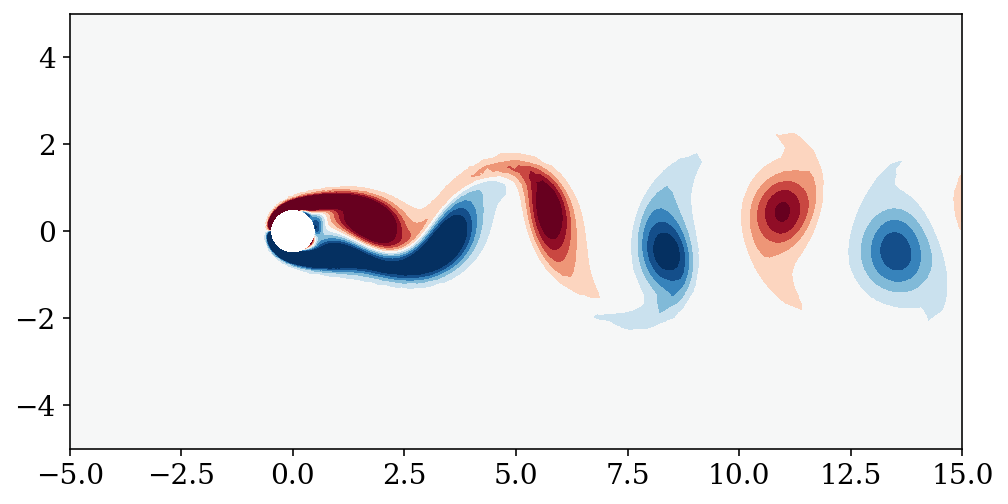

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
levels = np.linspace(-1.5, 1.5, 10)
fd.tricontourf(vort, axes=ax, levels=levels, cmap='RdBu', extend='both')
plt.show()

In [10]:
flow = gym.flow.Cylinder()
B_func = fd.Function(flow.mixed_space)
gym.utils.set_from_array(B_func, sys['B'][:, 0])

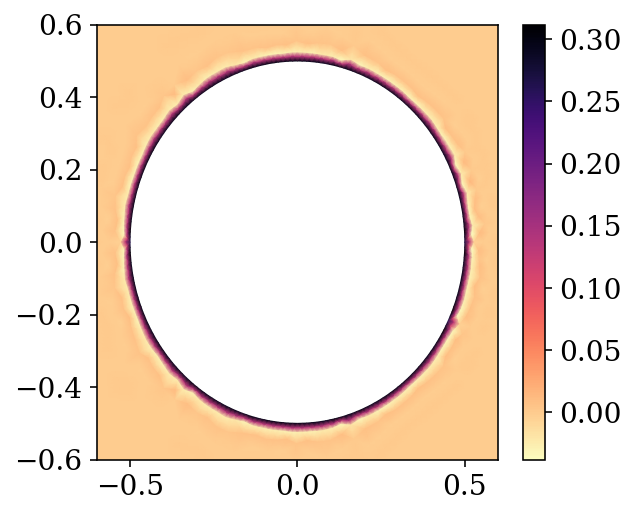

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(4.5, 4))
B_plt = fd.project(fd.sqrt(B_func.sub(0).sub(0)**2 + B_func.sub(0).sub(1)**2), flow.pressure_space)
im = fd.tripcolor(B_plt, axes=ax, cmap='magma_r')
plt.xlim([-0.6, 0.6])
plt.ylim([-0.6, 0.6])
plt.colorbar(im)

In [8]:
sys['B'][:, 0].shape

(78236,)